# Miguel Eduardo Castro Velasco
## Analisis de datos
## Dataset Regresión Lineal Vehicle dataset 
Contiene información técnica y de mercado de automóviles. El
objetivo es predecir el precio del automóvil en función de sus
atributos

1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.a.c.

2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

4.Dividir el dataset en Train y Test para evaluar correctamente el modelo.

5.Entrenar el modelo configurando los diferentes hiperparámetros.

6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

8.Interpretar, analizar y documentar los resultados obtenidos.

## 1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('car details v3.csv')

# Mostrar las primeras filas y obtener información general
print(data.head())
print(data.info())
print(data.describe())

# Verificar valores faltantes
print(data.isnull().sum())



                                                name    year  selling_price  \
0                             Maruti Swift Dzire VDI  2014.0       450000.0   
1                       Skoda Rapid 1.5 TDI Ambition  2014.0       370000.0   
2  Honda City 2017-2020 EXi,2006,158000,140000,Pe...     NaN            NaN   
3                          Hyundai i20 Sportz Diesel  2010.0       225000.0   
4  Maruti Swift VXI BSIII,2007,130000,120000,Petr...     NaN            NaN   

   km_driven    fuel seller_type transmission         owner     mileage  \
0   145500.0  Diesel  Individual       Manual   First Owner   23.4 kmpl   
1   120000.0  Diesel  Individual       Manual  Second Owner  21.14 kmpl   
2        NaN     NaN         NaN          NaN           NaN         NaN   
3   127000.0  Diesel  Individual       Manual   First Owner   23.0 kmpl   
4        NaN     NaN         NaN          NaN           NaN         NaN   

    engine   max_power                    torque  seats  
0  1248 CC      

# 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [4]:
# Tratar valores faltantes (relleno o eliminación)
data = data.dropna()  # O bien, puedes optar por data.fillna(método o valor específico)

# Convertir variables categóricas a numéricas si es necesario
# Ejemplo: data['columna_categorica'] = data['columna_categorica'].astype('category').cat.codes

# Eliminar duplicados
data = data.drop_duplicates()



# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

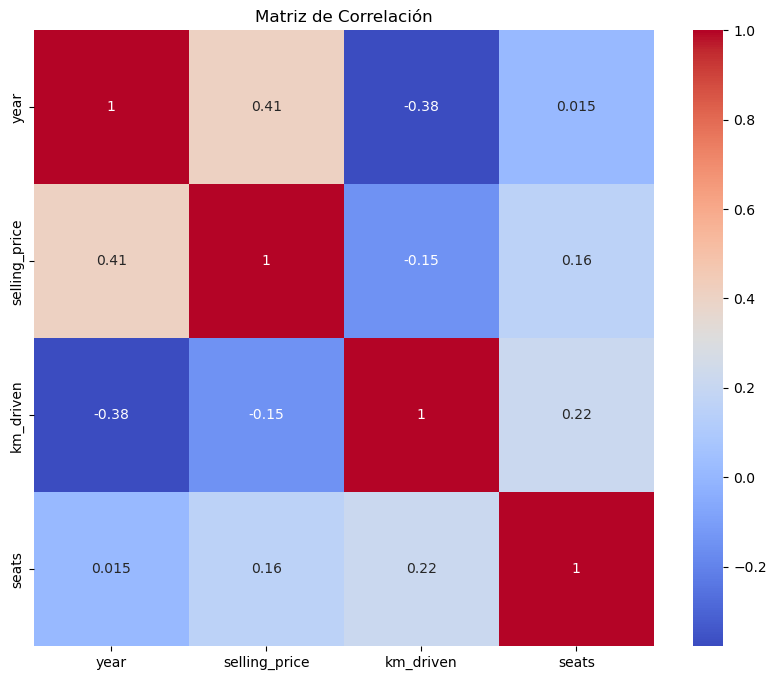

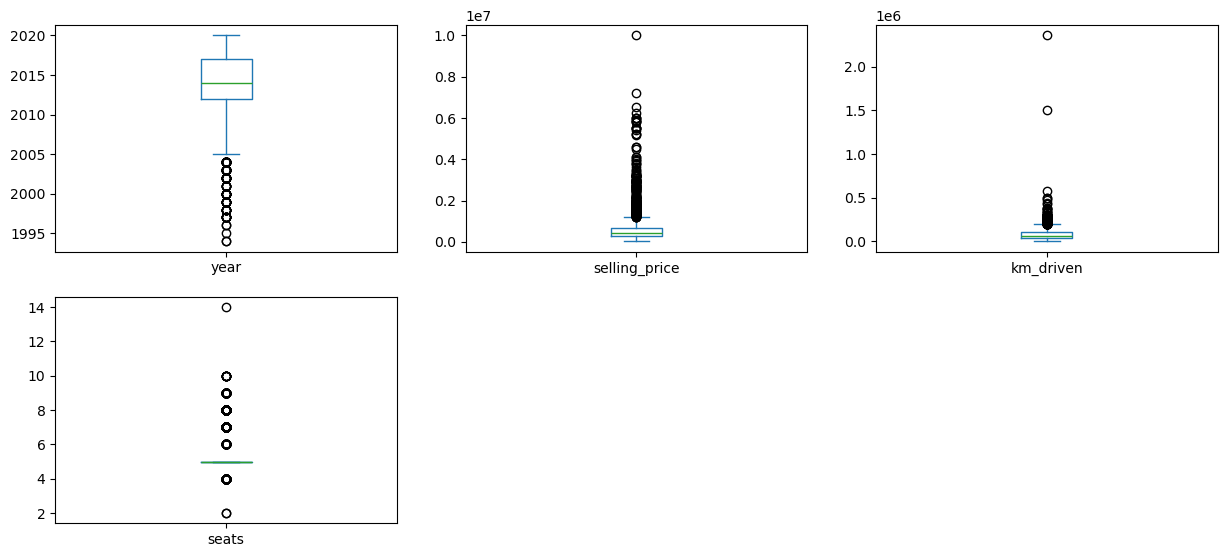

In [36]:
# Seleccionar solo las columnas numéricas
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

# Diagramas de caja para detectar valores atípicos
numerical_data.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.show()



# 4.Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [14]:
from sklearn.feature_selection import SelectKBest, f_regression

# Definir variables predictoras y objetivo
X = data.drop(['selling_price', 'name'], axis=1)  # 'selling_price' es la variable objetivo, y 'name' es una columna de texto
y = data['selling_price']

# Convertir variables categóricas a numéricas
X = pd.get_dummies(X, drop_first=True)

# Seleccionar características más relevantes
selector = SelectKBest(score_func=f_regression, k=10)  # Ajusta k según el número de características que desees
X_selected = selector.fit_transform(X, y)

# Mostrar las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)



Características seleccionadas: Index(['year', 'fuel_Diesel', 'seller_type_Individual', 'transmission_Manual',
       'engine_1969 CC', 'engine_1995 CC', 'engine_2993 CC',
       'max_power_190 bhp', 'torque_400Nm@ 1750-2500rpm',
       'torque_620Nm@ 2000-2500rpm'],
      dtype='object')


# 5.Entrenar el modelo configurando los diferentes hiperparámetros.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


# 6. Entrenamiento del modelo de regresión lineal

In [112]:
from sklearn.linear_model import LinearRegression

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


LinearRegression()

# 7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 98670650002.97206
Mean Absolute Error (MAE): 192885.6255607724
R-squared (R²): 0.5100747350970731


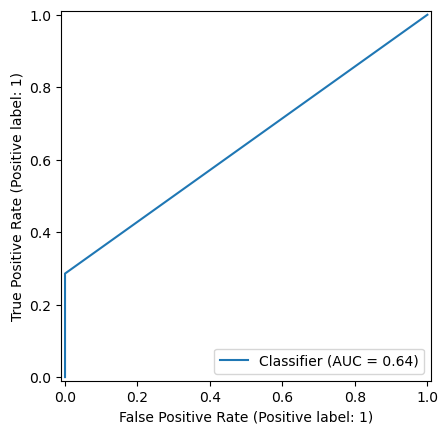

In [213]:
# Curva de precisión del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, prediccion)
plt.show()

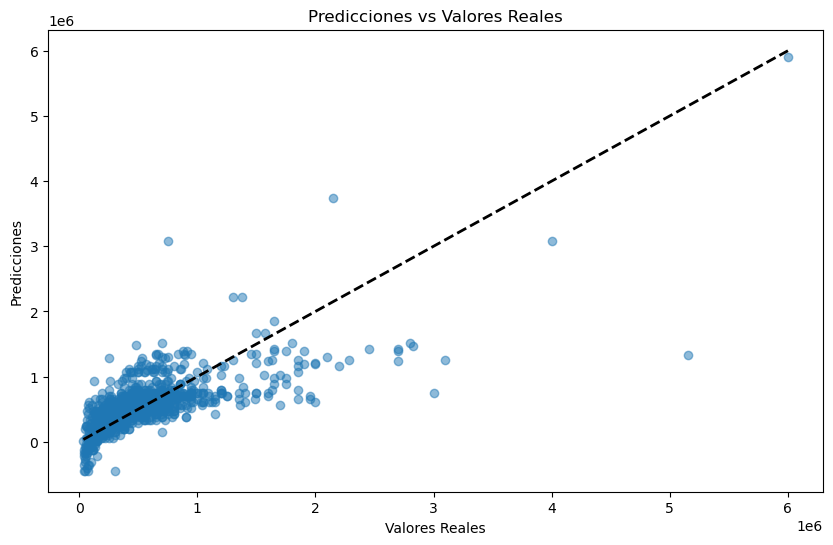

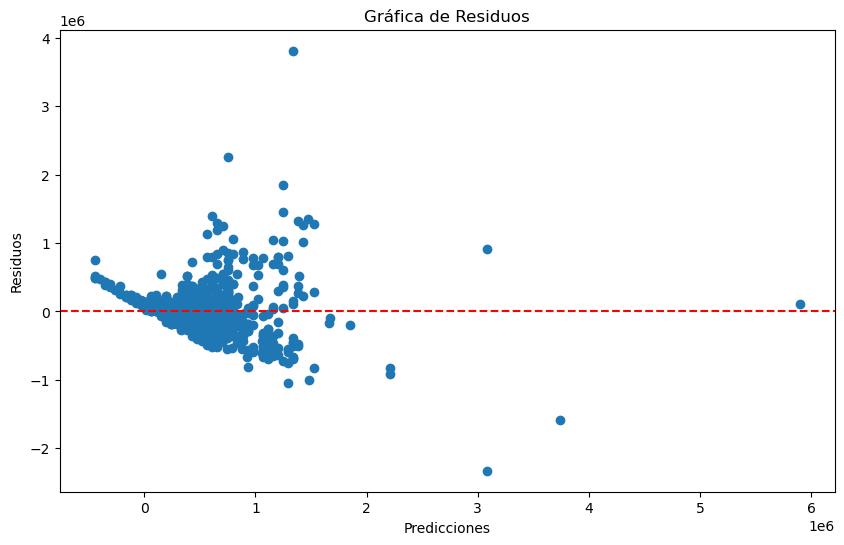

In [32]:
# Gráfica de Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()

# Gráfica de Residuos
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfica de Residuos")
plt.show()


### 8. Interpretación, Análisis y Documentación de Resultados

En esta sección, se llevará a cabo una interpretación detallada de las métricas de evaluación del modelo de regresión lineal, así como un análisis de las visualizaciones generadas. Cada una de estas perspectivas ofrece un panorama sobre la precisión, posibles errores y el ajuste general del modelo a los datos.

#### a. Interpretación de las Métricas de Evaluación

- **Mean Squared Error (MSE)**: El MSE mide el promedio de los errores al cuadrado entre las predicciones y los valores reales. Un valor de MSE bajo indica que los errores de predicción son relativamente pequeños, lo que sugiere que el modelo está ajustando bien los datos. Sin embargo, al ser una métrica que pondera los errores al cuadrado, tiende a amplificar los errores grandes. Es importante comparar el MSE con el valor promedio de la variable objetivo para evaluar la magnitud del error relativo.

- **Mean Absolute Error (MAE)**: El MAE mide el error promedio en términos absolutos. Al no elevar los errores al cuadrado, es menos sensible a valores atípicos. Un MAE bajo indica que el modelo tiene un buen desempeño en términos de error absoluto. Comparar el MAE con el valor promedio de la variable objetivo proporciona un sentido claro del tamaño del error en el mismo rango de los datos.

- **R-squared (R²)**: Esta métrica indica qué porcentaje de la variabilidad en los datos es explicada por el modelo. Un R² cercano a 1 significa que el modelo explica gran parte de la variación en la variable objetivo. Sin embargo, R² tiene limitaciones, ya que puede aumentar con la inclusión de más variables, incluso si no aportan significativamente al ajuste del modelo. Por esta razón, es útil considerar el **R² ajustado**, que penaliza la inclusión de variables irrelevantes.

#### b. Análisis de las Visualizaciones

- **Gráfica de Predicciones vs. Valores Reales**: En una regresión bien ajustada, los puntos en esta gráfica deberían alinearse aproximadamente en una línea diagonal donde \( y_{pred} = y_{test} \). La dispersión de los puntos alrededor de esta línea indica el grado de precisión del modelo: una dispersión amplia sugiere errores de predicción mayores, mientras que una distribución ajustada indica un buen rendimiento.

- **Gráfica de Residuos**: Los residuos (\( y_{test} - y_{pred} \)) reflejan las diferencias entre los valores reales y las predicciones. En un modelo bien ajustado, los residuos deben distribuirse aleatoriamente alrededor de cero. Si observamos patrones definidos (como una curva o una tendencia), esto puede ser indicativo de problemas en el ajuste del modelo, como una relación no lineal en los datos que no se está capturando correctamente. También podemos buscar puntos que se alejan significativamente de la mayoría, ya que pueden representar valores atípicos que afecten el modelo.

#### c. Documentación de los Resultados yde puntos atípicos.

- **Análisis de Variables Importantes**: Menciona qué variables (características) parecen estar más relacionadas con la variable objetivo. Esto se puede inferir a partir de la matriz de correlación, donde valores altos sugieren una relación fuerte entre la característica y la variable objetivo.

- **Recomendaciones para Mejorar el Modelo**:
   - **Transformaciones**: Si se observan relaciones no lineales, se podrían intentar transformar variables (por ejemplo, usando logaritmos o potencias) o usar un modelo más complejo.
   - **Eliminación o Tratamiento de Valores Atípicos**: Si existen valores atípicos significativos que afectan los resultados, considerar su eliminación o el uso de técnicas robustas para reducir su impacto.
   - **Evaluación de Características Adicionales**: Si el modelo no explica adecuadamente la variabilidad de los datos, se podrían explorar características adicionales o aplicar métodos de selección de características más complejel ajuste de hiperparámetros.
 futuras implementaciones.
